<a href="https://colab.research.google.com/github/AmeyaKasture/Sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidytext")
install.packages("janeaustenr")
library(stringr)
install.packages("reshape2")
install.packages("wordcloud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidytext)
sentiments

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [ ]:
get_sentiments("bing")

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [ ]:
library(janeaustenr)
library(stringr)
library(dplyr)

tidy_data <- austen_books() %>%
 group_by(book) %>%
 mutate(linenumber = row_number(),
   chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                          ignore_case = TRUE)))) %>%
ungroup() %>%
unnest_tokens(word, text)

In [ ]:
positive_senti <- get_sentiments("bing") %>%
 filter(sentiment == "positive")

tidy_data %>%
 filter(book == "Emma") %>%
 semi_join(positive_senti) %>%
 count(word, sort = TRUE)

Joining with `by = join_by(word)`


word,n
<chr>,<int>
well,401
good,359
great,264
like,200
better,173
enough,129
happy,125
love,117
pleasure,115


In [ ]:
library(tidyr)
bing <- get_sentiments("bing")
Emma_sentiment <- tidy_data %>%
 inner_join(bing) %>%
 count(book = "Emma" , index = linenumber %/% 80, sentiment) %>%
 spread(sentiment, n, fill = 0) %>%
 mutate(sentiment = positive - negative)

Joining with `by = join_by(word)`
Warning message in inner_join(., bing):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


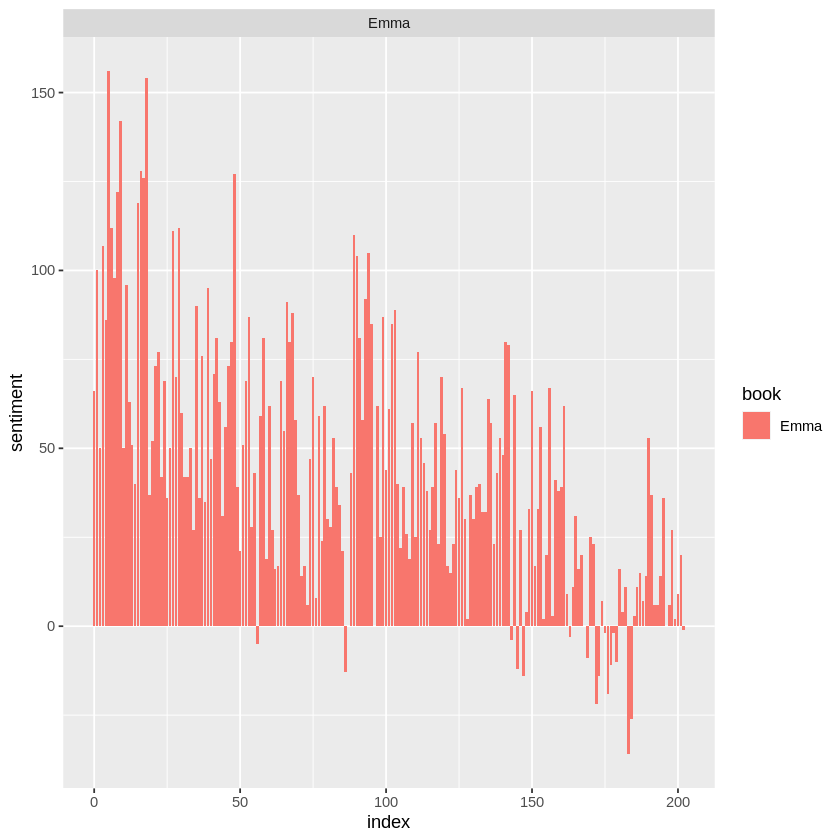

In [ ]:
library(ggplot2)

ggplot(Emma_sentiment, aes(index, sentiment, fill = book)) +
 geom_bar(stat = "identity", show.legend = TRUE) +
 facet_wrap(~book, ncol = 2, scales = "free_x")

In [ ]:
counting_words <- tidy_data %>%
 inner_join(bing) %>%
 count(word, sentiment, sort = TRUE)
head(counting_words)

Joining with `by = join_by(word)`
Warning message in inner_join(., bing):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


word,sentiment,n
<chr>,<chr>,<int>
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


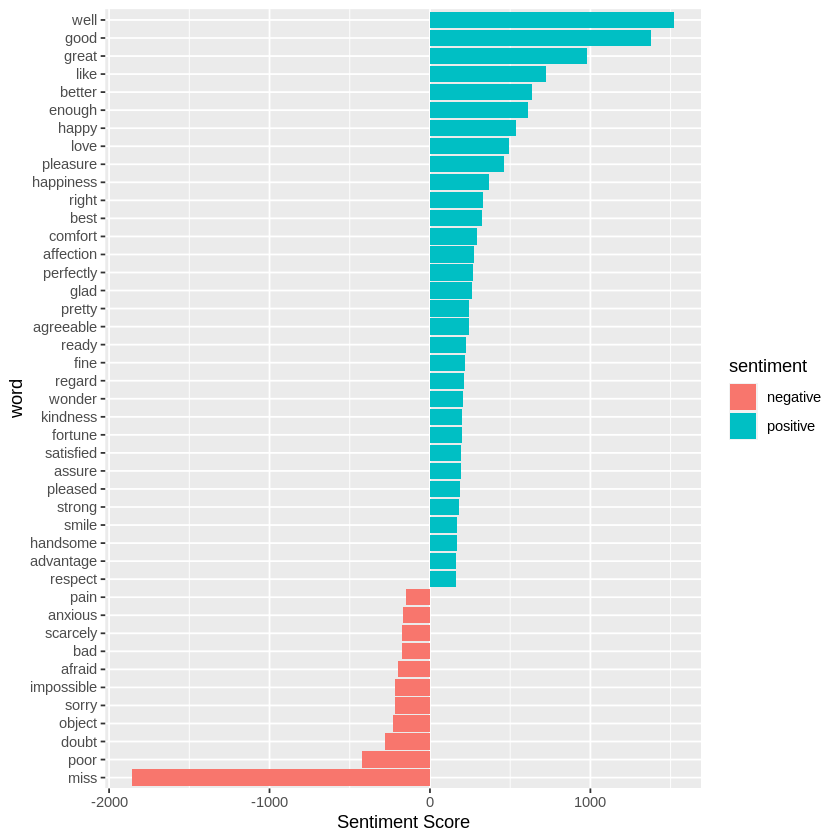

In [ ]:
counting_words %>%
 filter(n > 150) %>%
 mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
 mutate(word = reorder(word, n)) %>%
 ggplot(aes(word, n, fill = sentiment))+
 geom_col() +
 coord_flip() +
 labs(y = "Sentiment Score")


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: RColorBrewer

Joining with `by = join_by(word)`
Warning message in inner_join(., bing):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


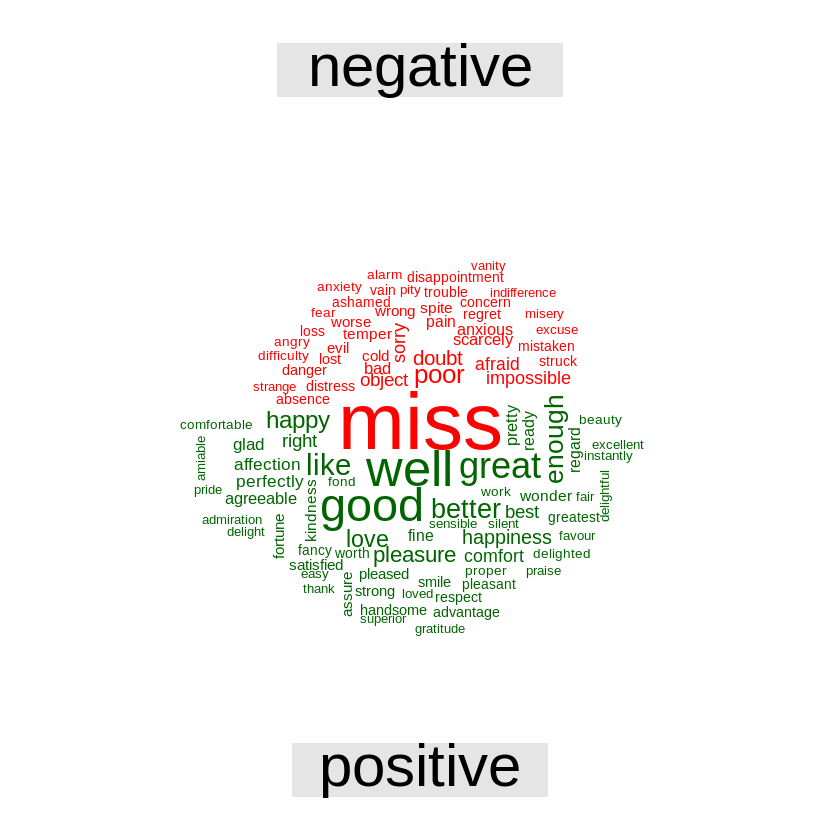

In [ ]:
library(reshape2)
library(wordcloud)
tidy_data %>%
 inner_join(bing) %>%
 count(word, sentiment, sort = TRUE) %>%
 acast(word ~ sentiment, value.var = "n", fill = 0) %>%
 comparison.cloud(colors = c("red", "dark green"),
          max.words = 100)